In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import joblib
from fbprophet import Prophet

In [78]:
m = joblib.load('model.pkl')
df = joblib.load('df.pkl')

In [79]:
future = m.make_future_dataframe(periods=119, freq='H')
future.tail(4)

,ds
382,2014-03-17 15:00:00
383,2014-03-17 16:00:00
384,2014-03-17 17:00:00
385,2014-03-17 18:00:00


In [80]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
381,2014-03-17 14:00:00,21321.283121,-288117.024811,341505.740950
382,2014-03-17 15:00:00,57978.853404,-250061.335997,366963.344907
383,2014-03-17 16:00:00,132496.858414,-208374.988226,455541.811502
384,2014-03-17 17:00:00,219160.017769,-98542.682142,555345.946650
385,2014-03-17 18:00:00,284891.024326,-17039.704665,610187.157784


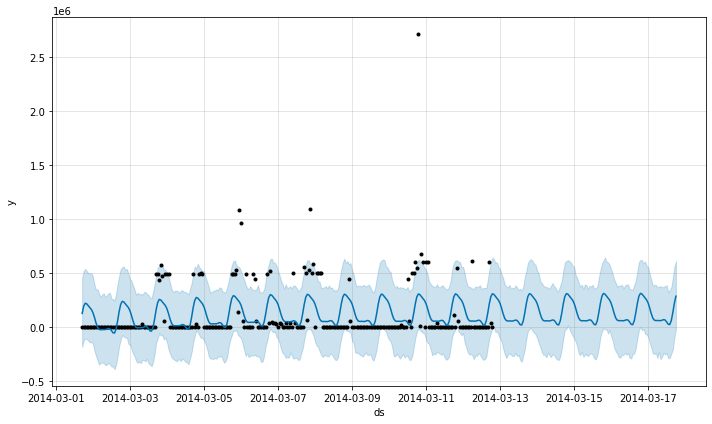

In [81]:
result = pd.concat([df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

In [82]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [83]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)

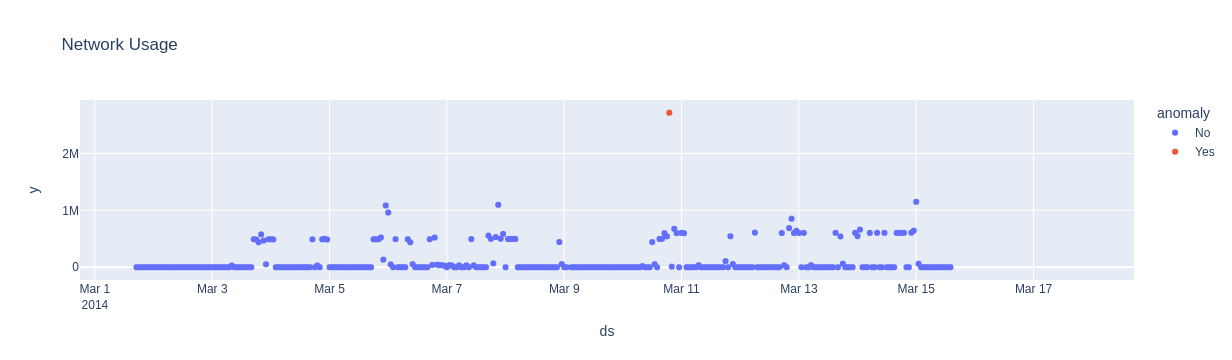

In [84]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='Network Usage')
fig.show()